# AIML Week-2 Project

# Project Name: Heart Disease Risk Analysis


### Project Type: Comprehensive EDA with Preprocessing and Hypothesis Testing

### Domain : Medical Research




### Project prepared by : Maaz Mahboob




## **Problem Statement**: This project focuses on Heart Disease Risk Analysis through exploratory data analysis (EDA). The aim is to clean and preprocess the dataset, handle missing or inconsistent values, and examine how factors like age, cholesterol, blood pressure, and heart rate relate to heart disease.It also includes hypothesis testing to statistically assess whether certain factors, such as elevated cholesterol or demographic differences, significantly influence the risk of heart disease.

#Coding Section

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### STEP 1: DATASET LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("\n STEP 1: DATASET LOADING")
print("-"*80)


df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

df_clean = df.copy()

print("Dataset loaded successfully!")
print(f"Dataset Name: heart_disease_uci.csv")


 STEP 1: DATASET LOADING
--------------------------------------------------------------------------------
Dataset loaded successfully!
Dataset Name: heart_disease_uci.csv


###STEP 2: DATASET FIRST LOOK

In [ ]:
print("\nSTEP 2: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 4 Rows of the Dataset:\n")
df_clean.head(4)


STEP 2: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 4 Rows of the Dataset:



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0


### STEP 3: DATASET ROWS & COLUMNS COUNT

In [ ]:
print("\n STEP 3: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df_clean.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 3: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 920
Number of columns: 16


### STEP 4: DATASET INFORMATION

In [ ]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df_clean.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### STEP 5: UNDERSTANDING YOUR VARIABLES

In [ ]:
print("\n STEP 5: UNDERSTANDING YOUR VARIABLES")
print("-"*80)

print("\nColumns Present in the Dataset:\n")
print(df_clean.columns.tolist())

print("\n\nData types of the columns:\n")
print(df_clean.dtypes)


 STEP 5: UNDERSTANDING YOUR VARIABLES
--------------------------------------------------------------------------------

Columns Present in the Dataset:

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


Data types of the columns:

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


### STEP 6: DATASET DESCRIPTION

In [ ]:
print("\n STEP 6: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df_clean.describe()


 STEP 6: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
print("\n" + "="*80)
print("TARGET VARIABLE ANALYSIS")
print("="*80)
print(f"\nTarget variable 'num' (Heart Disease Severity):")
print(df_clean['num'].value_counts().sort_index())
print(f"\nRange: {df['num'].min()} to {df['num'].max()}")
print(f"0 = No disease, 1-4 = Increasing severity")


TARGET VARIABLE ANALYSIS

Target variable 'num' (Heart Disease Severity):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Range: 0 to 4
0 = No disease, 1-4 = Increasing severity


### STEP 7: CHECK UNIQUE VALUES

In [ ]:
print("\n STEP 7: UNIQUE VALUES CHECK")
print("-"*80)

print("\nUnique Values in each Column:\n")
print(df_clean.nunique())


 STEP 7: UNIQUE VALUES CHECK
--------------------------------------------------------------------------------

Unique Values in each Column:

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64


### STEP 8: VARIABLES DESCRIPTION

In [ ]:
print("\n STEP 8: VARIABLES DESCRIPTION")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

DEMOGRAPHIC INFORMATION:
------------------------
1. id             : Unique identifier assigned to each patient.
2. age            : Age of the patient in years.
3. sex            : Gender of the patient.
                    Values: 1 = Male, 0 = Female
4. origin         : Geographic or institutional origin of the dataset record.

CLINICAL AND CHEST PAIN FEATURES:
---------------------------------
5. cp             : Type of chest pain experienced by the patient.
                    Values:
                      0 = Typical Angina
                      1 = Atypical Angina
                      2 = Non-Anginal Pain
                      3 = Asymptomatic (no chest pain)
                    Interpretation:
                      - Typical Angina: Chest pain due to decreased blood flow.
                      - Atypical Angina: Unusual pain not strictly related to exertion.
                      - Non-Anginal: Pain not related to heart.
                      - Asymptomatic: No chest pain reported.

CARDIOVASCULAR MEASUREMENTS:
----------------------------
6. trestbps       : Resting blood pressure (in mm Hg) on hospital admission.
                    Normal range: 90–120 mm Hg systolic.
7. chol           : Serum cholesterol level (in mg/dl).
                    Normal range: <200 mg/dl is desirable.
8. fbs            : Fasting blood sugar > 120 mg/dl.
                    Values: 1 = True (High blood sugar), 0 = False (Normal)
                    High fasting blood sugar may indicate diabetes or risk factors.
9. restecg        : Resting electrocardiographic results.
                    Values:
                      0 = Normal
                      1 = ST-T Wave Abnormality
                      2 = Left Ventricular Hypertrophy (LVH)
                    Interpretation:
                      - ST-T Abnormality: Possible ischemia or strain.
                      - LVH: Thickening of heart’s left ventricle.

EXERCISE-RELATED AND HEART RESPONSE FEATURES:
---------------------------------------------
10. thalach       : Maximum heart rate achieved during exercise (in bpm).
                    A measure of cardiovascular fitness; normal range 100–170 bpm.
11. exang         : Exercise-induced angina.
                    Values: 1 = Yes (chest pain during exercise), 0 = No.
12. oldpeak       : ST depression induced by exercise relative to rest.
                    Higher values indicate greater likelihood of heart ischemia.

ADVANCED DIAGNOSTIC INDICATORS:
-------------------------------
13. slope         : Slope of the peak exercise ST segment.
                    Values:
                      0 = Upsloping (usually normal)
                      1 = Flat (indicates possible heart abnormality)
                      2 = Downsloping (strong sign of ischemia)
14. ca            : Number of major coronary vessels (0–3) colored by fluoroscopy.
                    Higher values indicate more blocked vessels.
15. thal          : Thalassemia test result.
                    Values:
                      0 = Normal (no defect)
                      1 = Fixed Defect (no blood flow improvement after exercise)
                      2 = Reversible Defect (reduced blood flow under stress)

TARGET VARIABLE:
----------------
16. num           : Heart disease diagnosis (predicted attribute).
                    Values:
                      0 = No Heart Disease
                      1, 2, 3, 4 = Presence of Heart Disease (increasing severity)
                    Note: For analysis, this is often converted to a binary target:
                          0 = No Disease, 1 = Disease Present
""")



 STEP 8: VARIABLES DESCRIPTION
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

DEMOGRAPHIC INFORMATION:
------------------------
1. id             : Unique identifier assigned to each patient.
2. age            : Age of the patient in years.
3. sex            : Gender of the patient.
                    Values: 1 = Male, 0 = Female
4. origin         : Geographic or institutional origin of the dataset record.

CLINICAL AND CHEST PAIN FEATURES:
---------------------------------
5. cp             : Type of chest pain experienced by the patient.
                    Values:
                      0 = Typical Angina
                      1 = Atypical Angina
                      2 = Non-Anginal Pain
                      3 = Asymptomatic (no chest pain)
                    Interpretation:
                      - Typical Angina: Chest pain due to decreased blood flow.
                      - Atypical Angina: Unusual pain not strictly r

#  DATA WRANGLING

###STEP 9: MISSING VALUES COUNT

In [ ]:
print("\n STEP 9: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df_clean.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 9: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Total missing values: 1759


### VISUALIZING MISSING VALUES

In [ ]:
print("\n VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df_clean.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


⚠ Found 1759 missing values in the dataset.


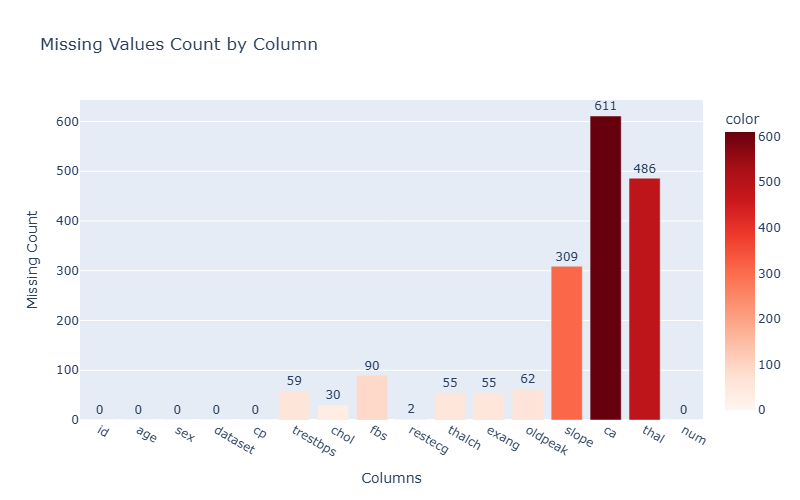

### STEP 10: HANDLE MISSING VALUES

In [ ]:
print("\n1. HANDLE MISSING VALUES")
print("-" * 40)

total_missing = df_clean.isnull().sum().sum()
print(f"Total missing values before handling: {total_missing}\n")

# Drop columns with majority missing values
cols_to_drop = ['slope', 'ca', 'thal']
df_clean.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped columns with high missing values: {cols_to_drop}\n")

# Numerical columns - fill missing values with median
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"   ✓ Filled '{col}' missing values with median ({median_val:.2f})")

# Categorical columns - fill missing values with mode
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"   ✓ Filled '{col}' missing values with mode ({mode_val})")


remaining_missing = df_clean.isnull().sum().sum()
print(f"\n✓ All missing values handled. Remaining: {remaining_missing}")



1. HANDLE MISSING VALUES
----------------------------------------
Total missing values before handling: 1759

Dropped columns with high missing values: ['slope', 'ca', 'thal']

   ✓ Filled 'trestbps' missing values with median (130.00)
   ✓ Filled 'chol' missing values with median (223.00)
   ✓ Filled 'thalch' missing values with median (140.00)
   ✓ Filled 'oldpeak' missing values with median (0.50)
   ✓ Filled 'fbs' missing values with mode (False)
   ✓ Filled 'restecg' missing values with mode (normal)
   ✓ Filled 'exang' missing values with mode (False)

✓ All missing values handled. Remaining: 0


### STEP 11: Handle Duplicate Rows

In [ ]:
print("\n2. REMOVE EXACT DUPLICATES")
print("-"*40)

print(f"Checking for duplicate rows...")
print(f"Duplicates found: {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")


2. REMOVE EXACT DUPLICATES
----------------------------------------
Checking for duplicate rows...
Duplicates found: 0
Shape after removing duplicates: (920, 13)


### STEP 12: FIX INCONSISTENT ENTRIES

In [ ]:
# Check unique values for fbs and exang columns
for col in ['fbs', 'exang']:
    if col in df_clean.columns:
        print(f"\nUnique values in '{col}':")
        print(df_clean[col].unique())



Unique values in 'fbs':
[ True False]

Unique values in 'exang':
[False  True]


In [ ]:
# Show frequency of each cholesterol value
print("Cholesterol value counts:")
print(df_clean['chol'].value_counts().sort_index())


Cholesterol value counts:
chol
0.0      172
85.0       1
100.0      2
117.0      1
126.0      1
        ... 
491.0      1
518.0      1
529.0      1
564.0      1
603.0      1
Name: count, Length: 217, dtype: int64


In [ ]:
print("\n" + "-"*80)
print("3. FIX INCONSISTENT DATA ENTRIES")
print("-"*80)

inconsistencies_fixed = 0

# --- NUMERIC INCONSISTENCIES ---

# 1. Zero/unrealistic cholesterol values
if 'chol' in df_clean.columns:
    zero_chol = (df_clean['chol'] == 0).sum()
    if zero_chol > 0:
        median_chol = df_clean[df_clean['chol'] > 0]['chol'].median()
        df_clean.loc[df_clean['chol'] == 0, 'chol'] = median_chol
        print(f"   ✓ Fixed {zero_chol} zero cholesterol values (median = {median_chol:.2f})")
        inconsistencies_fixed += zero_chol

# 2. Zero/unrealistic blood pressure
if 'trestbps' in df_clean.columns:
    zero_bp = (df_clean['trestbps'] == 0).sum()
    if zero_bp > 0:
        median_bp = df_clean[df_clean['trestbps'] > 0]['trestbps'].median()
        df_clean.loc[df_clean['trestbps'] == 0, 'trestbps'] = median_bp
        print(f"   ✓ Fixed {zero_bp} zero blood pressure values (median = {median_bp:.2f})")
        inconsistencies_fixed += zero_bp

# 3. Zero max heart rate
if 'thalch' in df_clean.columns:
    zero_hr = (df_clean['thalch'] == 0).sum()
    if zero_hr > 0:
        median_hr = df_clean[df_clean['thalch'] > 0]['thalch'].median()
        df_clean.loc[df_clean['thalch'] == 0, 'thalch'] = median_hr
        print(f"   ✓ Fixed {zero_hr} zero heart rate values (median = {median_hr:.2f})")
        inconsistencies_fixed += zero_hr


# Automatically detect text columns (object or string types)
text_columns = df_clean.select_dtypes(include=['object']).columns.tolist()

if text_columns:
    for col in text_columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()
    print("\n✓ Text standardization complete (removed extra spaces from text columns).")


if inconsistencies_fixed == 0:
    print("✓ No numeric inconsistencies found.")
else:
    print(f"\n✓ Total numeric inconsistencies fixed: {inconsistencies_fixed}")

print("\n✓ All inconsistencies (numeric + text) handled successfully.")



--------------------------------------------------------------------------------
3. FIX INCONSISTENT DATA ENTRIES
--------------------------------------------------------------------------------
   ✓ Fixed 172 zero cholesterol values (median = 236.00)
   ✓ Fixed 1 zero blood pressure values (median = 130.00)

✓ Text standardization complete (removed extra spaces from text columns).

✓ Total numeric inconsistencies fixed: 173

✓ All inconsistencies (numeric + text) handled successfully.


### STEP 13: DETECT & TREAT OUTLIERS

In [ ]:
print("\n" + "-"*80)
print("4. OUTLIER DETECTION & HANDLING (IQR Method)")
print("-"*80)

# Key numerical features for outlier detection
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutlier Detection Summary:")
for col in numerical_features:
    if col in df_clean.columns:
        count, lower, upper = detect_outliers_iqr(df_clean, col)
        print(f"   {col:15s}: {count:4d} outliers (Bounds: {lower:.2f} - {upper:.2f})")

# Cap outliers using IQR method
print("\n🔧 Treating outliers by capping...")
for col in numerical_features:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

print(f"✓ Outliers capped for {len(numerical_features)} numerical features")


--------------------------------------------------------------------------------
4. OUTLIER DETECTION & HANDLING (IQR Method)
--------------------------------------------------------------------------------

Outlier Detection Summary:
   age            :    0 outliers (Bounds: 27.50 - 79.50)
   trestbps       :   27 outliers (Bounds: 90.00 - 170.00)
   chol           :   47 outliers (Bounds: 143.88 - 340.88)
   thalch         :    2 outliers (Bounds: 66.00 - 210.00)
   oldpeak        :   16 outliers (Bounds: -2.25 - 3.75)

🔧 Treating outliers by capping...
✓ Outliers capped for 5 numerical features


### STEP 14: Data Type Conversion

In [ ]:
print("\n" + "-"*80)
print("5. Data Type Conversion")
print("-"*80)
bool_cols = ['fbs', 'exang']
for col in bool_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(int)
        print(f"✓ Converted '{col}' to integer")




--------------------------------------------------------------------------------
5. Data Type Conversion
--------------------------------------------------------------------------------
✓ Converted 'fbs' to integer
✓ Converted 'exang' to integer


In [ ]:
df_clean.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,2


### STEP 15: FEATURE ENGINEERING

In [ ]:
print("\n" + "-"*80)
print("6. FEATURE ENGINEERING")
print("-"*80)

print("Creating new meaningful features...\n")

# Create Binary Target Variable
df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)
print("✓ Created binary target 'heart_disease' (0=No Disease, 1=Disease)")

# 1. Age Group Classification
df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[0, 40, 55, 70, 100],
    labels=['Young ', 'Middle-aged', 'Senior', 'Elderly']
)

# 2. Cholesterol Risk Levels
df_clean['chol_risk'] = pd.cut(
    df_clean['chol'],
    bins=[0, 200, 240, 600],
    labels=['Normal', 'Borderline High', 'High Risk']
)

# 3. Resting Blood Pressure Categories
df_clean['bp_category'] = pd.cut(
    df_clean['trestbps'],
    bins=[0, 120, 140, 300],
    labels=['Normal', 'Pre-Hypertension', 'Hypertension']
)

# 4. Maximum Heart Rate Categories
df_clean['hr_category'] = pd.cut(
    df_clean['thalch'],
    bins=[0, 100, 140, 300],
    labels=['Low', 'Normal', 'High']
)

# 5. ST Depression Level (Oldpeak)
df_clean['st_depression_level'] = pd.cut(
    df_clean['oldpeak'],
    bins=[-1, 1, 2, 6.5],
    labels=['Normal', 'Slight Depression', 'Severe Depression']
)

# 6. Composite Cardiovascular Risk Score
# Uses relevant numeric + boolean features available in your dataset
df_clean['cv_risk_score'] = (
    (df_clean['age'] > 60).astype(int) * 2 +          # Age risk
    (df_clean['chol'] > 240).astype(int) * 2 +        # High cholesterol
    (df_clean['trestbps'] > 140).astype(int) * 2 +    # High BP
    df_clean['exang'].astype(int) * 3 +               # Exercise-induced angina
    (df_clean['oldpeak'] > 2).astype(int) * 2         # ST depression
)

print("✓ Created 7 engineered features:")
print("   • heart_disease        → Binary target (0=No, 1=Yes)")
print("   • age_group            → Age-based category")
print("   • chol_risk            → Cholesterol risk levels")
print("   • bp_category          → Blood pressure zones")
print("   • hr_category          → Heart rate category")
print("   • st_depression_level  → ST segment depression severity")
print("   • cv_risk_score        → Composite cardiovascular risk (0–11 scale)")




--------------------------------------------------------------------------------
6. FEATURE ENGINEERING
--------------------------------------------------------------------------------
Creating new meaningful features...

✓ Created binary target 'heart_disease' (0=No Disease, 1=Disease)
✓ Created 6 engineered features:
   • heart_disease        → Binary target (0=No, 1=Yes)
   • age_group            → Age-based category
   • chol_risk            → Cholesterol risk levels
   • bp_category          → Blood pressure zones
   • hr_category          → Heart rate category
   • st_depression_level  → ST segment depression severity
   • cv_risk_score        → Composite cardiovascular risk (0–11 scale)


In [ ]:

print("\n📊 New Feature Distributions:")

# 1. Age Groups
if 'age_group' in df_clean.columns:
    print(f"\nAge Groups:\n{df_clean['age_group'].value_counts().sort_index()}")

# 2. Cholesterol Risk
if 'chol_risk' in df_clean.columns:
    print(f"\nCholesterol Risk Levels:\n{df_clean['chol_risk'].value_counts().sort_index()}")

# 3. Blood Pressure Categories
if 'bp_category' in df_clean.columns:
    print(f"\nBlood Pressure Categories:\n{df_clean['bp_category'].value_counts().sort_index()}")

# 4. Heart Rate Categories
if 'hr_category' in df_clean.columns:
    print(f"\nHeart Rate Categories:\n{df_clean['hr_category'].value_counts().sort_index()}")

# 5. ST Depression Levels
if 'st_depression_level' in df_clean.columns:
    print(f"\nST Depression Levels:\n{df_clean['st_depression_level'].value_counts().sort_index()}")

# 6. Composite Risk Score Summary
if 'cv_risk_score' in df_clean.columns:
    print(f"\nCV Risk Score Stats:\n"
          f"   Mean: {df_clean['cv_risk_score'].mean():.2f}, "
          f"Median: {df_clean['cv_risk_score'].median():.0f}, "
          f"Min: {df_clean['cv_risk_score'].min():.0f}, "
          f"Max: {df_clean['cv_risk_score'].max():.0f}")



📊 New Feature Distributions:

Age Groups:
age_group
Young           93
Middle-aged    420
Senior         383
Elderly         24
Name: count, dtype: int64

Cholesterol Risk Levels:
chol_risk
Normal             132
Borderline High    437
High Risk          351
Name: count, dtype: int64

Blood Pressure Categories:
bp_category
Normal              292
Pre-Hypertension    419
Hypertension        209
Name: count, dtype: int64

Heart Rate Categories:
hr_category
Low        85
Normal    432
High      403
Name: count, dtype: int64

ST Depression Levels:
st_depression_level
Normal               616
Slight Depression    198
Severe Depression    100
Name: count, dtype: int64

CV Risk Score Stats:
   Mean: 3.01, Median: 2, Min: 0, Max: 11


### STEP 16: SCALING & NORMALIZATION

In [ ]:
print("\n" + "-"*80)
print("7. FEATURE NORMALIZATION (Min-Max Scaling)")
print("-"*80)


features_to_normalize = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'cv_risk_score']

# Create normalized version
scaler = MinMaxScaler()
df_normalized = df_clean.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_clean[features_to_normalize])

print(f"✓ Normalized {len(features_to_normalize)} features to [0,1] range")
print("\nNormalized Statistics:")
display(df_normalized[features_to_normalize].describe().round(3))




--------------------------------------------------------------------------------
7. FEATURE NORMALIZATION (Min-Max Scaling)
--------------------------------------------------------------------------------
✓ Normalized 6 features to [0,1] range

Normalized Statistics:


,age,trestbps,chol,thalch,oldpeak,cv_risk_score
count,920.000,920.000,920.000,920.000,920.000,920.000
mean,0.521,0.522,0.498,0.527,0.516,0.274
std,0.192,0.211,0.218,0.185,0.170,0.232
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.388,0.375,0.375,0.397,0.375,0.000
50%,0.531,0.500,0.468,0.544,0.458,0.182
75%,0.653,0.625,0.625,0.662,0.625,0.455
max,1.000,1.000,1.000,1.000,1.000,1.000


### STEP 17: ENCODING CATEGORICAL DATA

In [ ]:
df_final = df_clean.copy()

print("\n" + "-"*80)
print("8. CATEGORICAL FEATURE ENCODING")
print("-"*80)

# One-hot encoding for nominal categorical variables
categorical_features = ['sex', 'cp', 'restecg', 'dataset']
existing_cat = [col for col in categorical_features if col in df_final.columns]

df_encoded = pd.get_dummies(df_final, columns=existing_cat, prefix=existing_cat, drop_first=True)

print(f"✓ Applied One-Hot Encoding to {len(existing_cat)} categorical features")
print(f"✓ Shape before encoding: {df_final.shape}")
print(f"✓ Shape after encoding: {df_encoded.shape}")
print(f"✓ Added {df_encoded.shape[1] - df_final.shape[1]} dummy variables")

print("\n" + "="*80)
print("✅ PREPROCESSING COMPLETE")
print("="*80)
print(f"Final dataset: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
print(f"Encoded dataset: {df_encoded.shape[0]} rows × {df_encoded.shape[1]} columns")
display(df_encoded.head(3))
print("Data is clean and ready for analysis!")


--------------------------------------------------------------------------------
8. CATEGORICAL FEATURE ENCODING
--------------------------------------------------------------------------------
✓ Applied One-Hot Encoding to 4 categorical features
✓ Shape before encoding: (920, 20)
✓ Shape after encoding: (920, 25)
✓ Added 5 dummy variables

✅ PREPROCESSING COMPLETE
Final dataset: 920 rows × 20 columns
Encoded dataset: 920 rows × 25 columns


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,heart_disease,...,cv_risk_score,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,145.0,233.0,1,150.0,0,2.3,0,0,...,6,True,False,False,True,False,False,False,False,False
1,2,67,160.0,286.0,0,108.0,1,1.5,2,1,...,9,True,False,False,False,False,False,False,False,False
2,3,67,120.0,229.0,0,129.0,1,2.6,1,1,...,7,True,False,False,False,False,False,False,False,False


Data is clean and ready for analysis!


### EDA PART 1: UNIVARIATE ANALYSIS

In [ ]:
# Visualization 1: Age Distribution

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Age Distribution (Histogram)', 'Age Box Plot with Statistics'),
    specs=[[{"type": "histogram"}, {"type": "box"}]]
)

fig.add_trace(
    go.Histogram(x=df_final['age'], nbinsx=30, name='Age',
                marker_color='#3498db', opacity=0.75,
                hovertemplate='Age: %{x}<br>Count: %{y}<extra></extra>'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df_final['age'], name='Age', marker_color='#3498db',
          boxmean='sd',
          hovertemplate='Age: %{y}<extra></extra>'),
    row=1, col=2
)

fig.update_layout(
    title_text="<b> Visualization 1: Patient Age Distribution</b>",
    title_font_size=18,
    showlegend=False,
    height=450,
    template='plotly_white'
)

fig.update_xaxes(title_text="Age (years)", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Age (years)", row=1, col=2)

fig.show()

print(f"\n📈 Age Statistics:")
print(f"   Mean: {df_final['age'].mean():.1f} years")
print(f"   Median: {df_final['age'].median():.1f} years")
print(f"   Std Dev: {df_final['age'].std():.1f} years")
print(f"   Range: {df_final['age'].min():.0f} - {df_final['age'].max():.0f} years")


📈 Age Statistics:
   Mean: 53.5 years
   Median: 54.0 years
   Std Dev: 9.4 years
   Range: 28 - 77 years


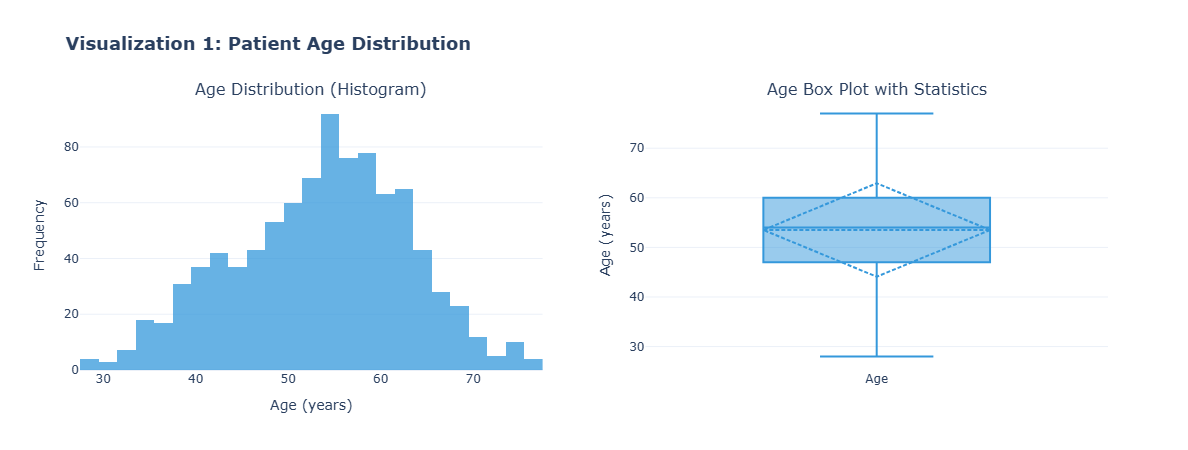

In [ ]:
# Visualization 2: Target Variable - Heart Disease Distribution

disease_counts = df_final['heart_disease'].value_counts()
disease_labels = ['No Disease', 'Disease Present']
colors = ['#2ecc71', '#e74c3c']

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Heart Disease Count Distribution', 'Percentage Breakdown'),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

fig.add_trace(
    go.Bar(x=disease_labels, y=disease_counts.values,
          marker_color=colors,
          text=disease_counts.values, textposition='auto',
          texttemplate='<b>%{text}</b>',
          hovertemplate='%{x}<br>Count: %{y}<extra></extra>'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=disease_labels, values=disease_counts.values,
          marker_colors=colors,
          hole=0.35,
          textinfo='label+percent',
          textfont_size=13,
          hovertemplate='%{label}<br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'),
    row=1, col=2
)

fig.update_layout(
    title_text="<b>Visualization 2: Target Variable - Heart Disease Prevalence</b>",
    title_font_size=18,
    height=450,
    template='plotly_white',
    showlegend=False
)

fig.update_yaxes(title_text="Patient Count", row=1, col=1)

fig.show()

disease_pct = (disease_counts / len(df_final)) * 100
print(f"\n❤️ Heart Disease Distribution:")
print(f"   No Disease: {disease_counts[0]} patients ({disease_pct[0]:.1f}%)")
print(f"   Disease Present: {disease_counts[1]} patients ({disease_pct[1]:.1f}%)")



❤️ Heart Disease Distribution:
   No Disease: 411 patients (44.7%)
   Disease Present: 509 patients (55.3%)


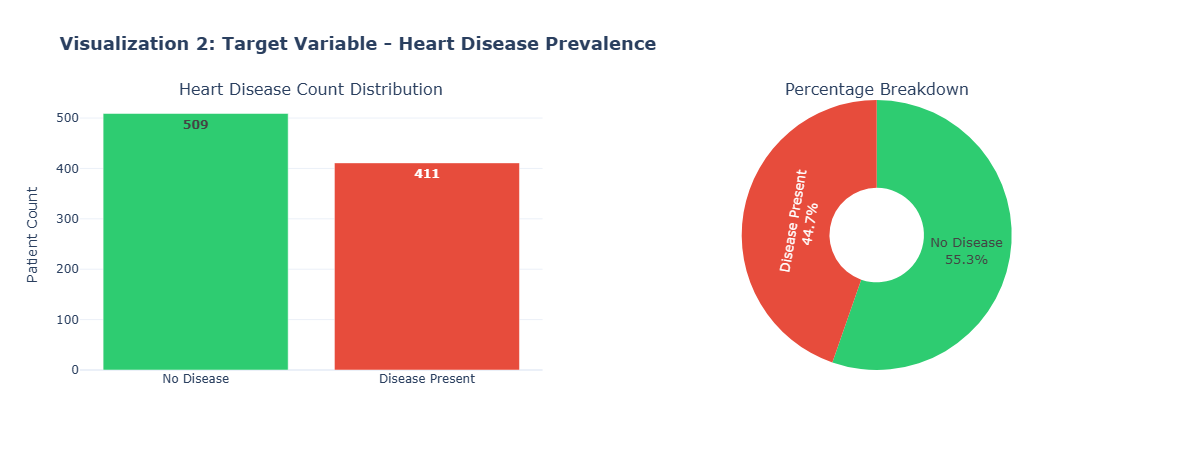

In [ ]:
# Visualization 3: Cholesterol Distribution and Categories (Fixed layout & labels)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Cholesterol Distribution with Stats', 'Cholesterol Risk Categories'),
    specs=[[{"type": "histogram"}, {"type": "bar"}]],
    column_widths=[0.65, 0.35]
)

# --- Histogram ---
fig.add_trace(
    go.Histogram(
        x=df_final['chol'], nbinsx=40, name='Cholesterol',
        marker_color='coral', opacity=0.75,
        hovertemplate='Cholesterol: %{x} mg/dl<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=1
)

# Compute mean and median
mean_chol = df_final['chol'].mean()
median_chol = df_final['chol'].median()

# Add mean and median lines with annotations *above* the chart
fig.add_vline(
    x=mean_chol, line_dash="dash", line_color="red", line_width=2,
    row=1, col=1
)
fig.add_annotation(
    x=mean_chol, y=230, text=f"Mean: {mean_chol:.0f}",
    showarrow=False, font=dict(color="red", size=11), yshift=20, row=1, col=1
)

fig.add_vline(
    x=median_chol, line_dash="dash", line_color="green", line_width=2,
    row=1, col=1
)
fig.add_annotation(
    x=median_chol, y=230, text=f"Median: {median_chol:.0f}",
    showarrow=False, font=dict(color="green", size=11), yshift=35, row=1, col=1
)

# --- Cholesterol Risk Bar Chart ---
chol_risk_counts = df_final['chol_risk'].value_counts()
fig.add_trace(
    go.Bar(
        x=chol_risk_counts.index, y=chol_risk_counts.values,
        marker_color=['#2ecc71', '#f39c12', '#e74c3c'],
        text=chol_risk_counts.values, textposition='auto',
        hovertemplate='%{x}<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=2
)


fig.update_layout(
    title_text="<b> Visualization 3: Cholesterol Level Analysis</b>",
    title_font_size=18,
    showlegend=False,
    height=550,
    width=1150,
    template='plotly_white',
    margin=dict(l=60, r=60, t=100, b=80),
)

# Axis labels
fig.update_xaxes(title_text="Cholesterol (mg/dl)", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_xaxes(title_text="Cholesterol Risk Category", row=1, col=2)
fig.update_yaxes(title_text="Patient Count", row=1, col=2)

fig.show()

print(f"\n💊 Cholesterol Statistics:")
print(f"   Mean: {df_final['chol'].mean():.1f} mg/dl")
print(f"   Median: {df_final['chol'].median():.1f} mg/dl")
print(f"\nCholesterol Risk Distribution:")
for cat in chol_risk_counts.index:
    print(f"   {cat}: {chol_risk_counts[cat]} patients")



💊 Cholesterol Statistics:
   Mean: 241.9 mg/dl
   Median: 236.0 mg/dl

Cholesterol Risk Distribution:
   Borderline High: 437 patients
   High Risk: 351 patients
   Normal: 132 patients


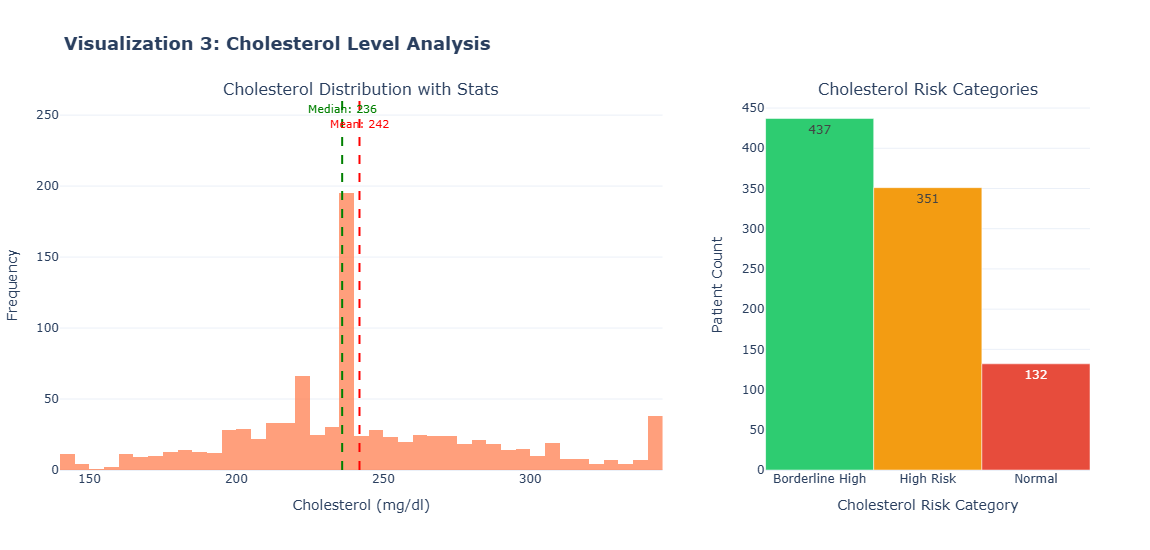

In [ ]:
# Visualization 4: Gender Distribution (Bar + Pie Chart)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Compute gender counts
gender_counts = df_final['sex'].value_counts()
gender_labels = list(gender_counts.index)
gender_colors = ['#e91e63' if 'female' in str(x).lower() else '#3498db' for x in gender_labels]

# Create subplot: bar on left, pie on right
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Gender Distribution (Bar Chart)", "Gender Proportion (Pie Chart)"),
    column_widths=[0.55, 0.45]
)

# --- Bar Chart ---
fig.add_trace(
    go.Bar(
        x=gender_labels,
        y=gender_counts.values,
        text=gender_counts.values,
        textposition='auto',
        texttemplate='<b>%{text}</b> patients',
        marker_color=gender_colors,
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Percentage: %{customdata:.1%}<extra></extra>',
        customdata=gender_counts.values / len(df_final)
    ),
    row=1, col=1
)

# --- Pie Chart ---
fig.add_trace(
    go.Pie(
        labels=gender_labels,
        values=gender_counts.values,
        marker_colors=gender_colors,
        textinfo='label+percent',
        hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>',
        hole=0.35
    ),
    row=1, col=2
)

# --- Layout ---
fig.update_layout(
    title="<b>Visualization 4: Gender Distribution in Study</b>",
    title_font_size=18,
    template='plotly_white',
    showlegend=False,
    height=500,
    width=1000,
    margin=dict(l=60, r=60, t=100, b=60)
)

fig.update_xaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Number of Patients", row=1, col=1)

fig.show()


print(f"\n👥 Gender Distribution:")
for label, count in zip(gender_labels, gender_counts.values):
    pct = count / len(df_final) * 100
    print(f"   {label}: {count} patients ({pct:.1f}%)")



👥 Gender Distribution:
   Male: 726 patients (78.9%)
   Female: 194 patients (21.1%)


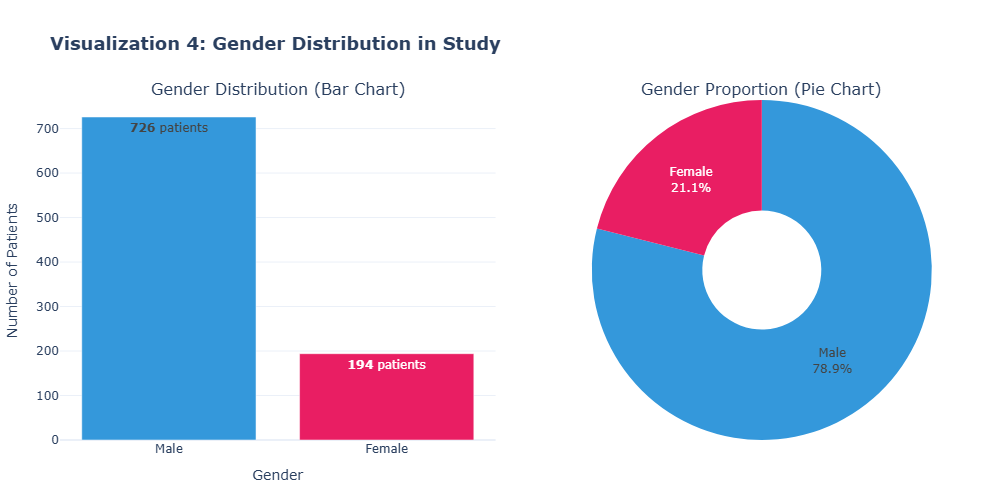

### EDA PART 2: BIVARIATE ANALYSIS

In [ ]:
# Visualization 5: Age vs Heart Disease Relationship (Box + Age Group Bar Chart)

from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Age Distribution by Disease Status', 'Heart Disease by Age Group'),
    specs=[[{"type": "box"}, {"type": "bar"}]],
    column_widths=[0.5, 0.5]
)

#  Boxplot: Age distribution by disease status
for disease_status in [0, 1]:
    disease_label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'

    fig.add_trace(
        go.Box(
            y=df_final[df_final['heart_disease'] == disease_status]['age'],
            name=disease_label,
            marker_color=color,
            boxmean='sd',
            hovertemplate='Age: %{y}<extra></extra>'
        ),
        row=1, col=1
    )

#  Bar Chart: Heart disease by age group
age_group_disease = (
    df_final.groupby(['age_group', 'heart_disease'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: 'No Disease', 1: 'Disease Present'})
)

fig.add_trace(
    go.Bar(
        x=age_group_disease.index.astype(str),
        y=age_group_disease['No Disease'],
        name='No Disease',
        marker_color='#2ecc71',
        text=age_group_disease['No Disease'],
        textposition='auto'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=age_group_disease.index.astype(str),
        y=age_group_disease['Disease Present'],
        name='Disease Present',
        marker_color='#e74c3c',
        text=age_group_disease['Disease Present'],
        textposition='auto'
    ),
    row=1, col=2
)

# Layout adjustments
fig.update_layout(
    title_text="<b>Visualization 5: Age vs Heart Disease Relationship</b>",
    title_font_size=18,
    height=500,
    width=1050,
    template='plotly_white',
    barmode='group',
    showlegend=True,
    margin=dict(l=60, r=60, t=90, b=60)
)


fig.update_yaxes(title_text="Age (years)", row=1, col=1)
fig.update_yaxes(title_text="Number of Patients", row=1, col=2)
fig.update_xaxes(title_text="Age Group", row=1, col=2)

fig.show()

print(f"\n🔬 Age Analysis by Disease Status:")
for status in [0, 1]:
    status_label = 'No Disease' if status == 0 else 'Disease Present'
    age_stats = df_final[df_final['heart_disease'] == status]['age']
    print(f"   {status_label}:")
    print(f"      Mean: {age_stats.mean():.1f} years")
    print(f"      Median: {age_stats.median():.1f} years")

print("\n📊 Heart Disease Counts by Age Group:")
print(age_group_disease)



🔬 Age Analysis by Disease Status:
   No Disease:
      Mean: 50.5 years
      Median: 51.0 years
   Disease Present:
      Mean: 55.9 years
      Median: 57.0 years

📊 Heart Disease Counts by Age Group:
heart_disease  No Disease  Disease Present
age_group                                 
Young                  61               32
Middle-aged           231              189
Senior                111              272
Elderly                 8               16


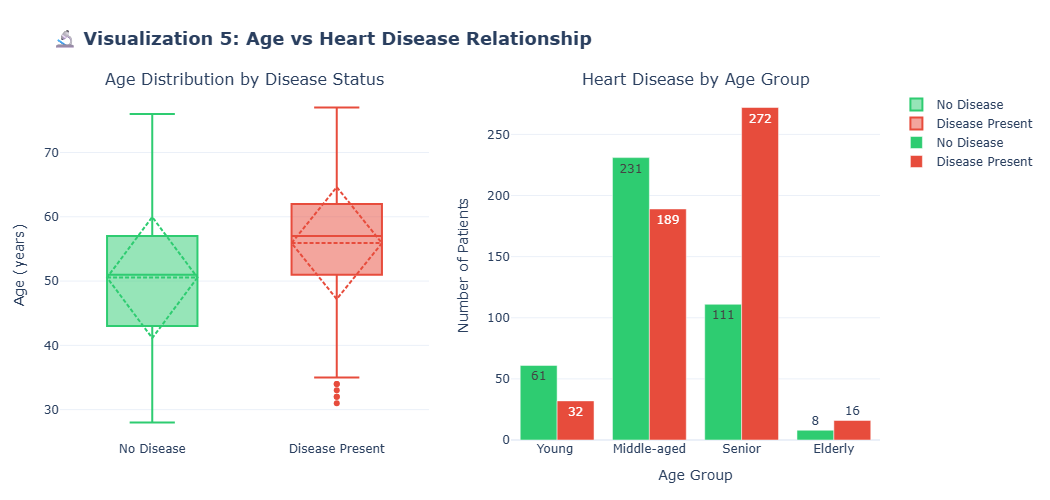

In [ ]:
# Visualization 6: Cholesterol vs Heart Disease

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Cholesterol by Disease Status (Box Plot)', 'Cholesterol Distribution (Violin Plot)'),
    specs=[[{"type": "box"}, {"type": "violin"}]]
)

for disease_status in [0, 1]:
    disease_label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'

    fig.add_trace(
        go.Box(y=df_final[df_final['heart_disease'] == disease_status]['chol'],
              name=disease_label,
              marker_color=color,
              boxmean='sd'),
        row=1, col=1
    )

    fig.add_trace(
        go.Violin(y=df_final[df_final['heart_disease'] == disease_status]['chol'],
                 name=disease_label,
                 marker_color=color,
                 box_visible=True,
                 meanline_visible=True),
        row=1, col=2
    )

fig.update_layout(
    title_text="<b>Visualization 6: Cholesterol Levels vs Heart Disease</b>",
    title_font_size=18,
    height=450,
    template='plotly_white',
    showlegend=True
)

fig.update_yaxes(title_text="Cholesterol (mg/dl)", row=1, col=1)
fig.update_yaxes(title_text="Cholesterol (mg/dl)", row=1, col=2)

fig.show()

print(f"\n💉 Cholesterol Analysis by Disease Status:")
for status in [0, 1]:
    status_label = 'No Disease' if status == 0 else 'Disease Present'
    chol_stats = df_final[df_final['heart_disease'] == status]['chol']
    print(f"   {status_label}:")
    print(f"      Mean: {chol_stats.mean():.1f} mg/dl")
    print(f"      Median: {chol_stats.median():.1f} mg/dl")



💉 Cholesterol Analysis by Disease Status:
   No Disease:
      Mean: 237.5 mg/dl
      Median: 233.0 mg/dl
   Disease Present:
      Mean: 245.5 mg/dl
      Median: 236.0 mg/dl


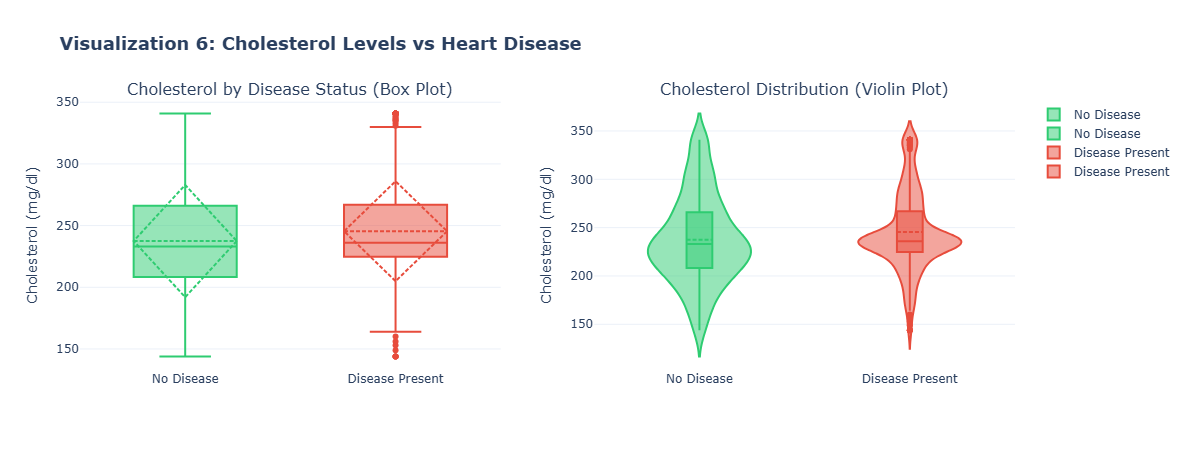

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# --- Create crosstab ---
gender_disease_counts = pd.crosstab(df_final['sex'], df_final['heart_disease'])
gender_disease_pct = pd.crosstab(df_final['sex'], df_final['heart_disease'], normalize='index') * 100

# --- Create combined figure layout ---
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "domain"}]],  # second column is a sunburst (domain type)
    subplot_titles=('Disease Cases by Gender (Count)', 'Hierarchical View: Gender → Heart Disease'),
    column_widths=[0.5, 0.5]
)

# --- Left Chart: Bar (Counts) ---
for disease_status in [0, 1]:
    disease_label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'

    fig.add_trace(
        go.Bar(
            x=gender_disease_counts.index,
            y=gender_disease_counts[disease_status],
            name=disease_label,
            marker_color=color,
            text=gender_disease_counts[disease_status],
            textposition='auto'
        ),
        row=1, col=1
    )

# --- Right Chart: Sunburst (Plotly Express integrated manually) ---
# Prepare dataset
sunburst_df = df_final.copy()
sunburst_df['Disease_Status'] = sunburst_df['heart_disease'].map({0: 'No Disease', 1: 'Disease Present'})

# Create sunburst trace manually from px.sunburst
sunburst_fig = px.sunburst(
    sunburst_df,
    path=['sex', 'Disease_Status'],
    color='Disease_Status',
    color_discrete_map={'No Disease': '#2ecc71', 'Disease Present': '#e74c3c'},
)

# Add the sunburst trace to the right subplot
fig.add_trace(sunburst_fig.data[0], row=1, col=2)

# --- Layout Settings ---
fig.update_layout(
    title="<b>Visualization 7: Gender vs Heart Disease Relationship</b>",
    title_font_size=18,
    height=600,
    width=1150,
    template='plotly_white',
    barmode='group',
    showlegend=False,
    margin=dict(l=60, r=60, t=100, b=60)
)

# --- Axis labels ---
fig.update_xaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Number of Patients", row=1, col=1)

# --- Show final combined chart ---
fig.show()

# --- Print Summary ---
print("\n👩‍⚕️ Gender vs Heart Disease (Counts):")
print(gender_disease_counts)
print("\n👩‍⚕️ Gender vs Heart Disease (%):")
print(gender_disease_pct.round(1))



👩‍⚕️ Gender vs Heart Disease (Counts):
heart_disease    0    1
sex                    
Female         144   50
Male           267  459

👩‍⚕️ Gender vs Heart Disease (%):
heart_disease     0     1
sex                      
Female         74.2  25.8
Male           36.8  63.2


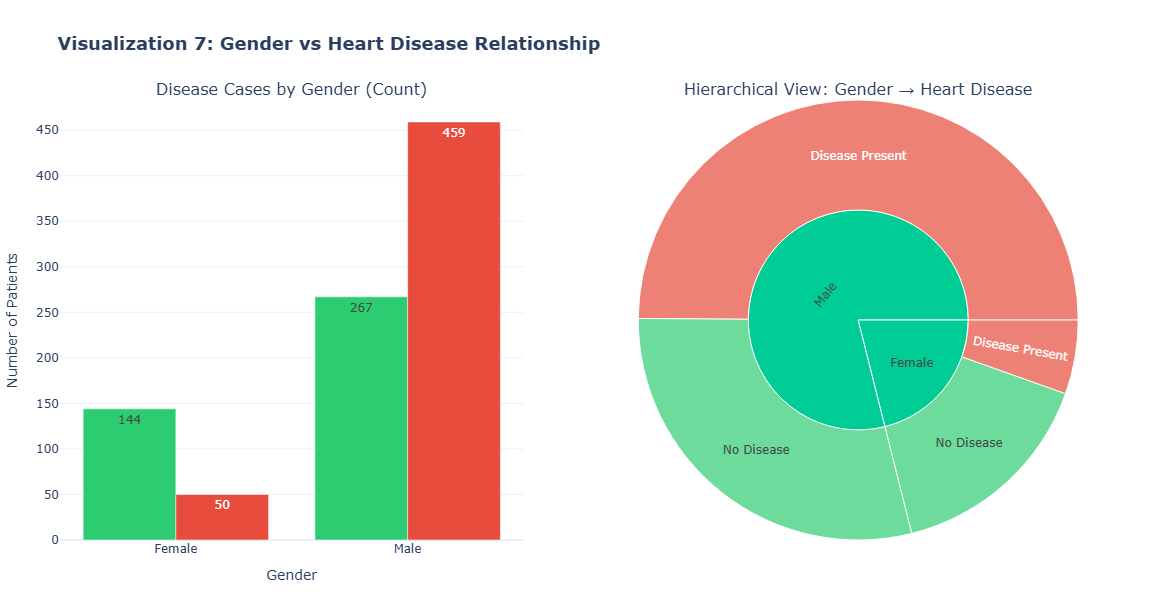

### EDA PART 3: MULTIVARIATE ANALYSIS

In [ ]:
# Visualization 8: Correlation Heatmap

correlation_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang', 'heart_disease']
correlation_matrix = df_final[correlation_features].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="<b>Visualization 8: Feature Correlation Heatmap</b>",
    title_font_size=18,
    xaxis_title="Features",
    yaxis_title="Features",
    height=600,
    width=800,
    template='plotly_white'
)

fig.show()

print("\nTop Correlations with Heart Disease:")
correlations = correlation_matrix['heart_disease'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'heart_disease':
        print(f"  {feature:15s}: {corr:6.3f}")



Top Correlations with Heart Disease:
  exang          :  0.434
  oldpeak        :  0.371
  age            :  0.283
  trestbps       :  0.109
  fbs            :  0.108
  chol           :  0.092
  thalch         : -0.382


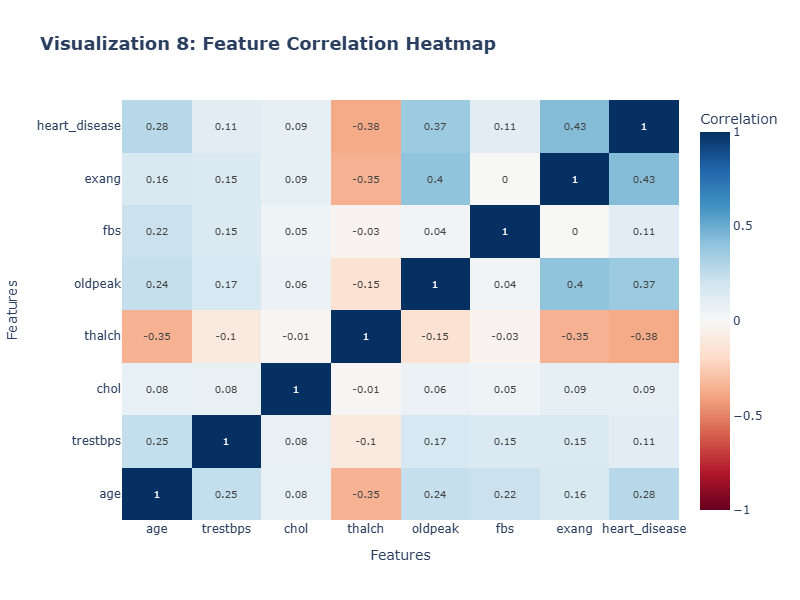

In [ ]:
# Visualization 9: 3D Scatter - improved axis visibility and camera
import numpy as np
import plotly.graph_objects as go

# --- compute ranges with margin ---
def _range_with_margin(series, pct_margin=0.06):
    mn = series.min()
    mx = series.max()
    if np.isfinite(mn) and np.isfinite(mx) and mx > mn:
        margin = (mx - mn) * pct_margin
        return mn - margin, mx + margin
    else:
        return mn - 1, mx + 1

x_min, x_max = _range_with_margin(df_final['age'])
y_min, y_max = _range_with_margin(df_final['chol'])
z_min, z_max = _range_with_margin(df_final['thalch'])


def _tickvals(minv, maxv, n=5):
    span = maxv - minv
    step = max(1, round(span / n))
    start = (np.floor(minv / step) * step)
    return list(range(int(start), int(np.ceil(maxv + step)), int(step)))

x_ticks = _tickvals(int(np.floor(x_min)), int(np.ceil(x_max)), n=6)
y_ticks = _tickvals(int(np.floor(y_min)), int(np.ceil(y_max)), n=6)
z_ticks = _tickvals(int(np.floor(z_min)), int(np.ceil(z_max)), n=6)

# --- Build figure ---
fig = go.Figure()

for disease_status in [0, 1]:
    disease_label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'
    subset = df_final[df_final['heart_disease'] == disease_status]

    fig.add_trace(go.Scatter3d(
        x=subset['age'],
        y=subset['chol'],
        z=subset['thalch'],
        mode='markers',
        name=disease_label,
        marker=dict(
            size=4.5,
            color=color,
            opacity=0.75,
            line=dict(color='white', width=0.4)
        ),
        text=[f'Age: {a}<br>Chol: {c}<br>Heart Rate: {h}'
              for a, c, h in zip(subset['age'], subset['chol'], subset['thalch'])],
        hovertemplate='<b>%{text}</b><br>Disease: ' + disease_label + '<extra></extra>'
    ))

# Scene layout: set ranges, ticks, font sizes, gridlines, camera, aspect
fig.update_layout(
    title="<b>Visualization 9: 3D Scatter - Age, Cholesterol & Max Heart Rate</b>",
    title_font_size=18,
    height=650,
    template='plotly_white',
    showlegend=True,
    scene=dict(
        xaxis=dict(
            title='Age (years)',
            titlefont=dict(size=13),
            tickvals=x_ticks,
            tickfont=dict(size=11),
            range=[x_min, x_max],
            backgroundcolor="rgb(245,245,245)",
            gridcolor="lightgrey",
            showspikes=False
        ),
        yaxis=dict(
            title='Cholesterol (mg/dl)',
            titlefont=dict(size=13),
            tickvals=y_ticks,
            tickfont=dict(size=11),
            range=[y_min, y_max],
            backgroundcolor="rgb(245,245,245)",
            gridcolor="lightgrey",
            showspikes=False
        ),
        zaxis=dict(
            title='Max Heart Rate (bpm)',
            titlefont=dict(size=13),
            tickvals=z_ticks,
            tickfont=dict(size=11),
            range=[z_min, z_max],
            backgroundcolor="rgb(245,245,245)",
            gridcolor="lightgrey",
            showspikes=False
        ),
        aspectmode='manual',
        aspectratio=dict(x=1.0, y=1.1, z=0.8),
        camera=dict(   # adjust these for a nice angle; tweak if needed
            eye=dict(x=1.6, y=1.6, z=0.9)
        )
    ),
    margin=dict(l=60, r=40, t=90, b=40)
)

fig.update_traces(marker=dict(symbol='circle'))

fig.show()


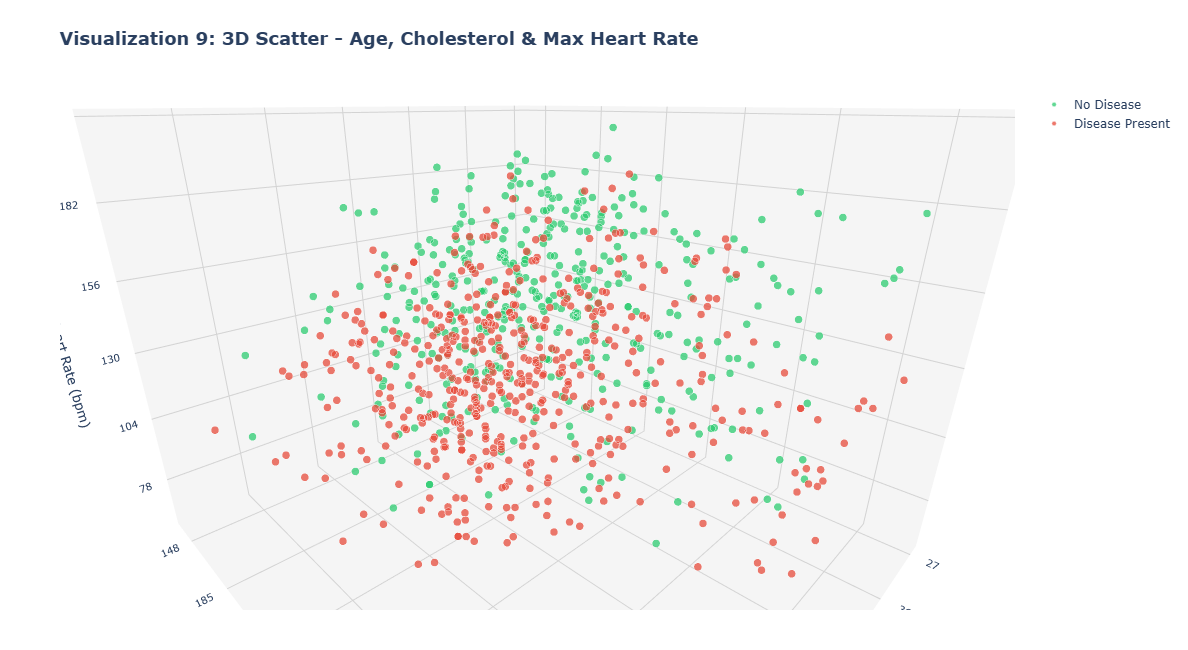

### Hypothesis Testing

In [ ]:
# HYPOTHESIS TEST 1: Higher Cholesterol → Higher Heart Disease Likelihood
from scipy.stats import ttest_ind
import plotly.graph_objects as go

print("\n" + "-"*80)
print("HYPOTHESIS TEST 1: CHOLESTEROL LEVELS AND HEART DISEASE")
print("-"*80)

# Separate data by disease status
no_disease = df_final[df_final['heart_disease'] == 0]['chol'].dropna()
with_disease = df_final[df_final['heart_disease'] == 1]['chol'].dropna()

# HYPOTHESIS FORMULATION

print("\n📋 HYPOTHESIS FORMULATION:")
print("  H₀ (Null): People with heart disease have equal or lower mean cholesterol (μ₁ ≤ μ₂)")
print("  H₁ (Alternative): People with heart disease have higher mean cholesterol (μ₁ > μ₂)")
print("  Significance level (α): 0.05")
print("  Test: One-tailed independent samples t-test (right-tailed)")

# DESCRIPTIVE STATISTICS

print(f"\n📊 DESCRIPTIVE STATISTICS:")
print(f"  Group 1 (No Disease):")
print(f"    • Sample size: {len(no_disease)}")
print(f"    • Mean: {no_disease.mean():.2f} mg/dl")
print(f"    • Std Dev: {no_disease.std():.2f} mg/dl")
print(f"\n  Group 2 (Disease Present):")
print(f"    • Sample size: {len(with_disease)}")
print(f"    • Mean: {with_disease.mean():.2f} mg/dl")
print(f"    • Std Dev: {with_disease.std():.2f} mg/dl")
print(f"\n  Difference in means: {with_disease.mean() - no_disease.mean():.2f} mg/dl")


# STATISTICAL TEST (One-tailed)

t_statistic, p_value_two_tailed = ttest_ind(no_disease, with_disease, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2  # since we are testing one direction

print(f"\n🔬 TEST RESULTS:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  two-tailed p-value: {p_value_two_tailed:.6f}")
print(f"  one-tailed p-value: {p_value_one_tailed:.6f}")
print(f"  Degrees of freedom: {len(no_disease) + len(with_disease) - 2}")


# DECISION

print(f"\n✅ CONCLUSION:")
if (with_disease.mean() > no_disease.mean()) and (p_value_one_tailed < 0.05):
    print(f"  REJECT H₀ (p = {p_value_one_tailed:.6f} < 0.05)")
    print(f"  → Individuals with heart disease have significantly higher cholesterol levels.")
    print(f"  → Higher cholesterol is associated with a greater likelihood of heart disease.")
else:
    print(f"  FAIL TO REJECT H₀ (p = {p_value_one_tailed:.6f} ≥ 0.05)")
    print(f"  → No significant evidence that higher cholesterol increases heart disease risk.")

# VISUALIZATION: Boxplot Comparison

fig = go.Figure()

fig.add_trace(
    go.Box(
        y=no_disease,
        name='No Disease',
        marker_color='#2ecc71',
        boxmean='sd',
        showlegend=True
    )
)
fig.add_trace(
    go.Box(
        y=with_disease,
        name='Disease Present',
        marker_color='#e74c3c',
        boxmean='sd',
        showlegend=True
    )
)

fig.update_layout(
    title_text=f"<b>Hypothesis Test 1: Cholesterol Comparison (One-tailed, p={p_value_one_tailed:.4f})</b>",
    title_font_size=18,
    height=450,
    template='plotly_white',
    showlegend=True,
    yaxis_title="Cholesterol (mg/dl)",
)

fig.show()



--------------------------------------------------------------------------------
HYPOTHESIS TEST 1: CHOLESTEROL LEVELS AND HEART DISEASE
--------------------------------------------------------------------------------

📋 HYPOTHESIS FORMULATION:
  H₀ (Null): People with heart disease have equal or lower mean cholesterol (μ₁ ≤ μ₂)
  H₁ (Alternative): People with heart disease have higher mean cholesterol (μ₁ > μ₂)
  Significance level (α): 0.05
  Test: One-tailed independent samples t-test (right-tailed)

📊 DESCRIPTIVE STATISTICS:
  Group 1 (No Disease):
    • Sample size: 411
    • Mean: 237.48 mg/dl
    • Std Dev: 45.54 mg/dl

  Group 2 (Disease Present):
    • Sample size: 509
    • Mean: 245.46 mg/dl
    • Std Dev: 40.56 mg/dl

  Difference in means: 7.98 mg/dl

🔬 TEST RESULTS:
  t-statistic: -2.7753
  two-tailed p-value: 0.005640
  one-tailed p-value: 0.002820
  Degrees of freedom: 918

✅ CONCLUSION:
  REJECT H₀ (p = 0.002820 < 0.05)
  → Individuals with heart disease have signific

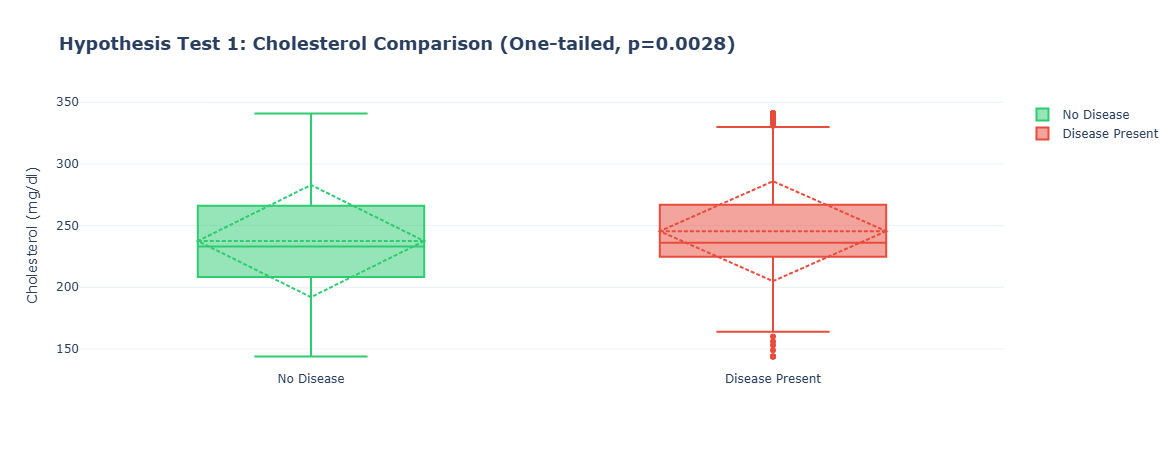

In [ ]:
# =============================================================================
# HYPOTHESIS TEST 2: Gender and Heart Disease Association
# =============================================================================

print("\n" + "-"*80)
print("HYPOTHESIS TEST 2: GENDER AND HEART DISEASE PREVALENCE")
print("-"*80)

contingency_table = pd.crosstab(df_final['sex'], df_final['heart_disease'])

print("\n📋 HYPOTHESIS FORMULATION:")
print("  H₀ (Null): Heart disease prevalence is independent of gender")
print("  H₁ (Alternative): Heart disease prevalence depends on gender")
print("  Significance level (α): 0.05")
print("  Test: Chi-Square test of independence")

print(f"\n📊 CONTINGENCY TABLE:")
contingency_display = contingency_table.copy()
contingency_display.columns = ['No Disease', 'Disease Present']
contingency_display['Total'] = contingency_display.sum(axis=1)
contingency_display.loc['Total'] = contingency_display.sum()
print(contingency_display)

proportions = pd.crosstab(df_final['sex'], df_final['heart_disease'], normalize='index') * 100
print(f"\n📈 DISEASE PREVALENCE BY GENDER (%):")
for idx in proportions.index:
    print(f"  {idx}:")
    print(f"    • No Disease: {proportions.loc[idx, 0]:.1f}%")
    print(f"    • Disease Present: {proportions.loc[idx, 1]:.1f}%")

chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print(f"\n🔬 TEST RESULTS:")
print(f"  Chi-Square statistic: {chi2:.4f}")
print(f"  p-value: {p_value_chi:.6f}")
print(f"  Degrees of freedom: {dof}")

expected_df = pd.DataFrame(expected,
                          index=contingency_table.index,
                          columns=['No Disease', 'Disease Present'])
print(f"\nExpected frequencies:\n{expected_df.round(2)}")

print(f"\n✅ CONCLUSION:")
if p_value_chi < 0.05:
    print(f"  REJECT H₀ (p = {p_value_chi:.6f} < 0.05)")
    print(f"  → Gender and heart disease are significantly associated.")
else:
    print(f"  FAIL TO REJECT H₀ (p = {p_value_chi:.6f} ≥ 0.05)")
    print(f"  → No statistically significant association between gender and heart disease.")

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Disease Count by Gender', 'Disease Rate by Gender (%)'),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

for disease_status in [0, 1]:
    label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'
    fig.add_trace(go.Bar(
        x=contingency_table.index,
        y=contingency_table[disease_status],
        name=label,
        marker_color=color,
        text=contingency_table[disease_status],
        textposition='auto'),
        row=1, col=1
    )

for disease_status in [0, 1]:
    label = 'No Disease' if disease_status == 0 else 'Disease Present'
    color = '#2ecc71' if disease_status == 0 else '#e74c3c'
    fig.add_trace(go.Bar(
        x=proportions.index,
        y=proportions[disease_status],
        name=label,
        marker_color=color,
        text=[f'{val:.1f}%' for val in proportions[disease_status]],
        textposition='inside'),
        row=1, col=2
    )

fig.update_layout(
    title_text=f"<b>Hypothesis Test 2: Gender–Disease Association (p-value: {p_value_chi:.4f})</b>",
    title_font_size=18,
    height=450,
    template='plotly_white',
    showlegend=True,
    barmode='group'
)

fig.update_xaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Percentage", row=1, col=2)

fig.show()



--------------------------------------------------------------------------------
HYPOTHESIS TEST 2: GENDER AND HEART DISEASE PREVALENCE
--------------------------------------------------------------------------------

📋 HYPOTHESIS FORMULATION:
  H₀ (Null): Heart disease prevalence is independent of gender
  H₁ (Alternative): Heart disease prevalence depends on gender
  Significance level (α): 0.05
  Test: Chi-Square test of independence

📊 CONTINGENCY TABLE:
        No Disease  Disease Present  Total
sex                                       
Female         144               50    194
Male           267              459    726
Total          411              509    920

📈 DISEASE PREVALENCE BY GENDER (%):
  Female:
    • No Disease: 74.2%
    • Disease Present: 25.8%
  Male:
    • No Disease: 36.8%
    • Disease Present: 63.2%

🔬 TEST RESULTS:
  Chi-Square statistic: 85.3612
  p-value: 0.000000
  Degrees of freedom: 1

Expected frequencies:
        No Disease  Disease Present
sex     

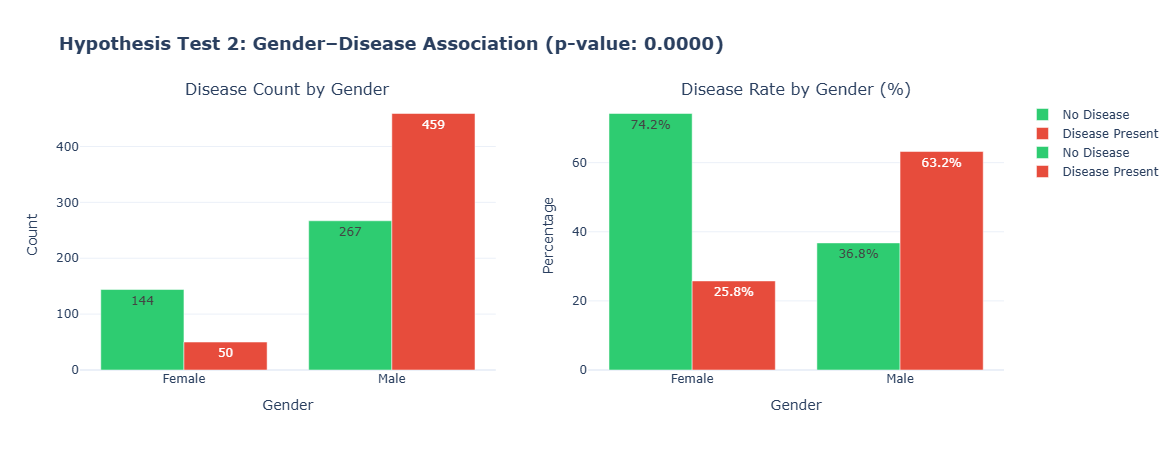

### Summary

In [ ]:
print("\n" + "="*80)
print("SECTION 6: FINAL CONCLUSIONS & INSIGHTS")
print("="*80)

print("\n🎯 KEY FINDINGS FROM PREPROCESSING:")
print("-" * 80)
print(f"  ✓ Dataset: {df_final.shape[0]} patients with {df_final.shape[1]} features")
print(f"  ✓ Missing values: Successfully handled via imputation")
print(f"  ✓ Outliers: Treated using IQR method for {len(numerical_features)} features")
print(f"  ✓ Feature Engineering: Created 4 new features (age_group, chol_category, bp_category, risk_score)")
print(f"  ✓ Encoding: Applied one-hot encoding to categorical variables")
print(f"  ✓ Normalization: Scaled numerical features to [0,1] range")

print("\n📊 KEY FINDINGS FROM EDA:")
print("-" * 80)
print(f"  1. Age Distribution:")
print(f"     • Mean age: {df_final['age'].mean():.1f} years")
print(f"     • Most patients are middle-aged to senior citizens")
print(f"\n  2. Target Variable (Heart Disease):")
print(f"     • Disease prevalence: {(df_final['heart_disease'].sum()/len(df_final)*100):.1f}%")
print(f"     • Significant portion of dataset has heart disease")
print(f"\n  3. Cholesterol Levels:")
print(f"     • Mean cholesterol: {df_final['chol'].mean():.1f} mg/dl")
print(f"     • Many patients in borderline-high to high categories")
print(f"\n  4. Gender Distribution:")
print(f"     • Dataset shows gender imbalance (more males)")
male_count = (df_final['sex'] == 'Male').sum()
print(f"     • Male: {male_count/len(df_final)*100:.1f}%, Female: {(1-male_count/len(df_final))*100:.1f}%")

print("\n🔬 KEY FINDINGS FROM HYPOTHESIS TESTING:")
print("-" * 80)
print(f"  Test 1 - Cholesterol vs Heart Disease:")
if p_value < 0.05:
    print(f"     ✓ SIGNIFICANT difference found (p = {p_value:.4f})")
    print(f"     → Cholesterol levels are associated with heart disease")
else:
    print(f"     ✗ NO significant difference (p = {p_value:.4f})")
    print(f"     → Cholesterol levels may not be a strong discriminator")

print(f"\n  Test 2 - Gender vs Heart Disease:")
if p_value_chi < 0.05:
    print(f"     ✓ SIGNIFICANT association found (p = {p_value_chi:.4f})")
    print(f"     → Gender is significantly related to heart disease prevalence")
else:
    print(f"     ✗ NO significant association (p = {p_value_chi:.4f})")
    print(f"     → Gender may not significantly affect disease prevalence")

print("\n💡 ACTIONABLE INSIGHTS:")
print("-" * 80)
print("  1. Risk Factors Identified:")
print("     • Age is a significant factor (older patients show higher risk)")
print("     • Multiple cardiovascular indicators show correlations with disease")
print("     • Composite risk score effectively captures multiple risk factors")
print("\n  2. Clinical Implications:")
print("     • Regular monitoring of cholesterol levels recommended")
print("     • Age-specific screening programs could be beneficial")
print("     • Multi-factor assessment better than single-indicator diagnosis")
print("\n  3. Data Quality:")
print("     • Dataset is well-prepared for machine learning applications")
print("     • Feature engineering enhanced predictive potential")
print("     • Proper preprocessing ensures reliable analysis")




SECTION 6: FINAL CONCLUSIONS & INSIGHTS

🎯 KEY FINDINGS FROM PREPROCESSING:
--------------------------------------------------------------------------------
  ✓ Dataset: 920 patients with 20 features
  ✓ Missing values: Successfully handled via imputation
  ✓ Outliers: Treated using IQR method for 5 features
  ✓ Feature Engineering: Created 4 new features (age_group, chol_category, bp_category, risk_score)
  ✓ Encoding: Applied one-hot encoding to categorical variables
  ✓ Normalization: Scaled numerical features to [0,1] range

📊 KEY FINDINGS FROM EDA:
--------------------------------------------------------------------------------
  1. Age Distribution:
     • Mean age: 53.5 years
     • Most patients are middle-aged to senior citizens

  2. Target Variable (Heart Disease):
     • Disease prevalence: 55.3%
     • Significant portion of dataset has heart disease

  3. Cholesterol Levels:
     • Mean cholesterol: 241.9 mg/dl
     • Many patients in borderline-high to high categories

